# Unit Tests For Kinetic Learning

In [1]:
from KineticLearning import learn_dynamics 
import pandas as pd

In [2]:
#Import DataFrame from CSV & Define Important Variables
limonene_df = pd.read_csv('data/limonene_data.csv')
controls = ['AtoB', 'GPPS', 'HMGR', 'HMGS', 'Idi','Limonene Synthase', 'MK', 'PMD', 'PMK']
states = ['Acetyl-CoA','HMG-CoA', 'Mevalonate', 'Mev-P', 'IPP/DMAPP', 'Limonene']

/Users/zakcostello/anaconda/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


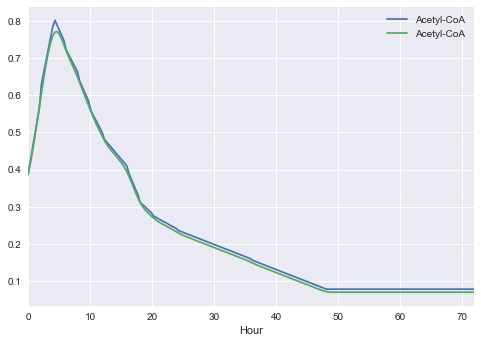

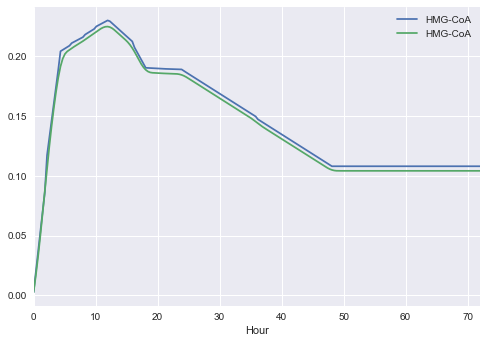

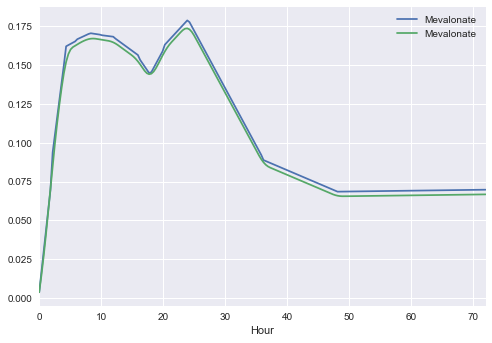

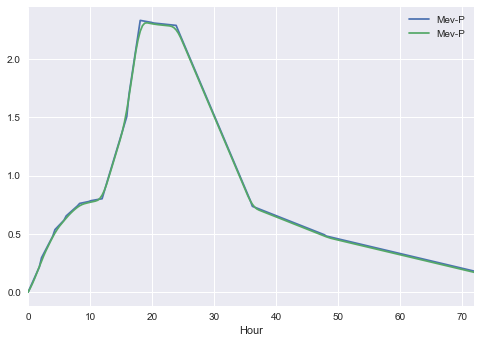

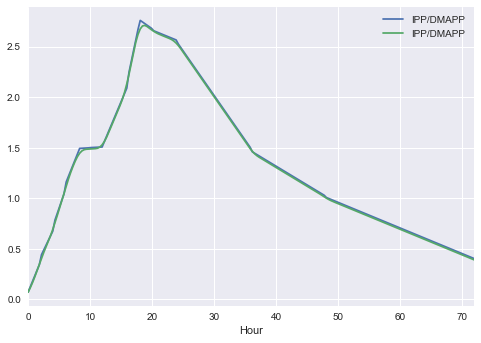

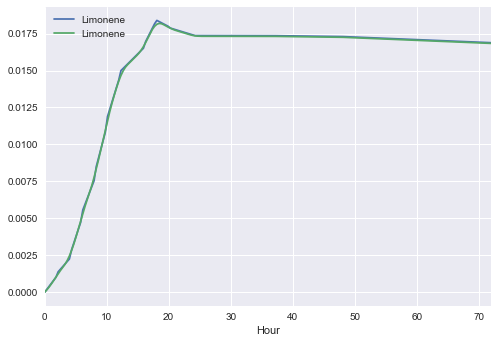

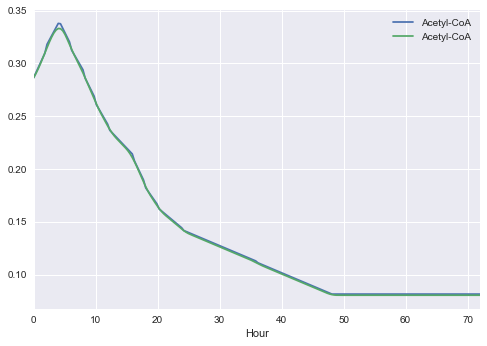

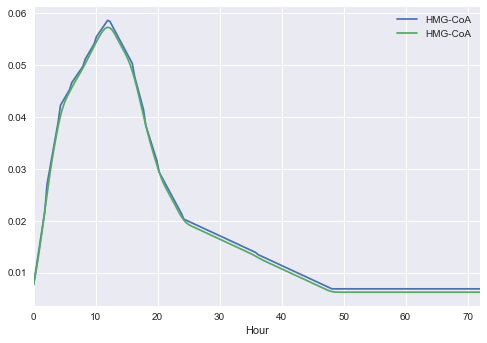

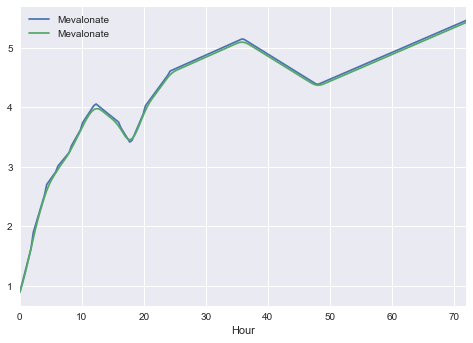

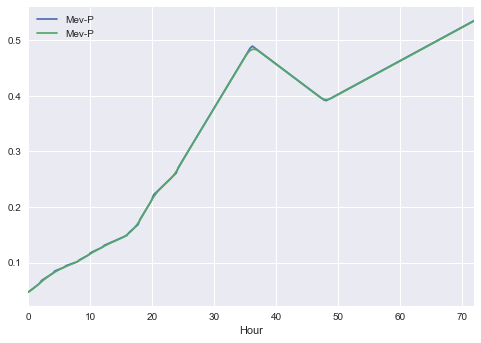

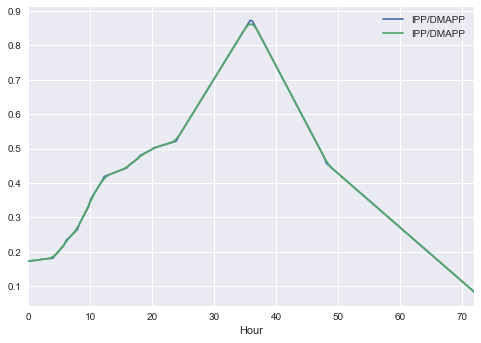

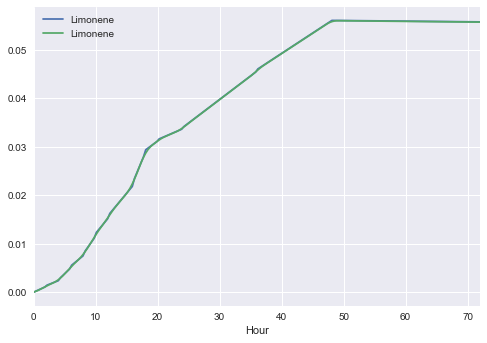

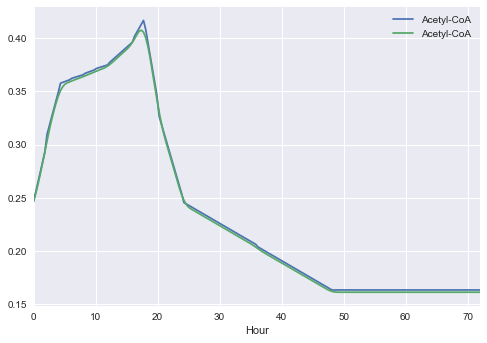

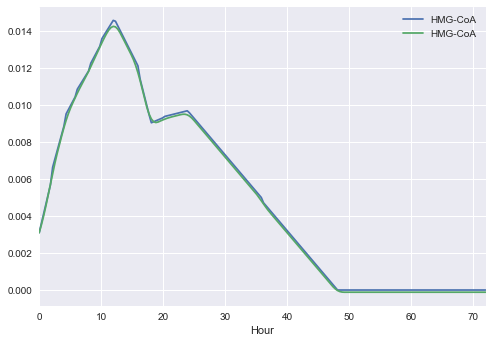

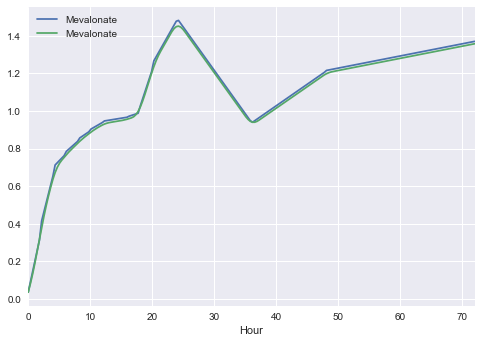

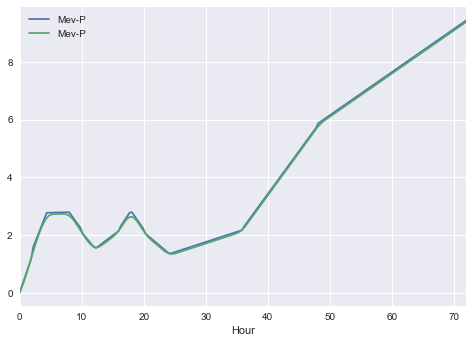

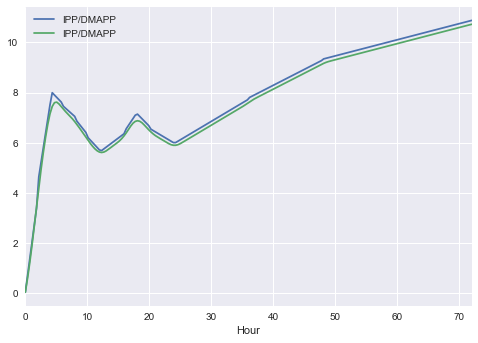

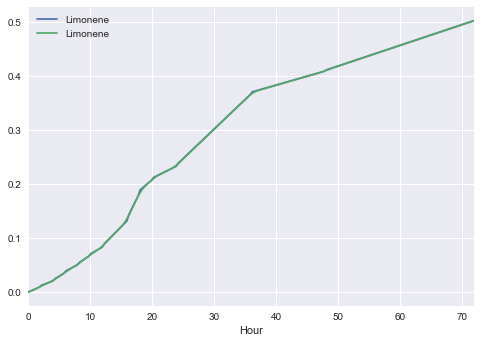

In [3]:
from KineticLearning import format_dataframe,augment_data,estimate_state_derivative,check_derivative

#Check to See if Derivative Is Computed Properly
tsdf = format_dataframe(limonene_df,states,controls)
tsdf = augment_data(tsdf)
tsdf = estimate_state_derivative(tsdf)
check_derivative(tsdf)

## Learn the Dynamics of the Limonene Pathway

In [ ]:
model = learn_dynamics(limonene_df,states,controls,data_augmentation=200)

In [ ]:
strain_df = tsdf.loc[tsdf.index.get_level_values(0)=='L2']
trajectory_df = simulate_dynamics(model,strain_df)#Plot Predictions!

In [ ]:
for metabolite in tsdf['states'].columns:
    plt.figure()
    ax = plt.gca()
    strain_df['states'].loc[strain_df.index.get_level_values(0)=='L2'].reset_index().plot(x='Hour',y=metabolite,ax=ax)
    trajectory_df.plot(x='Hour',y=metabolite,ax=ax)
    plt.show()